Kode untuk mengimpor berbagai modul yang dibutuhkan untuk analisis data dan machine learning. Pandas digunakan untuk manipulasi data dalam bentuk tabel, sedangkan NumPy untuk operasi matematis pada array. Seaborn dan Matplotlib membantu membuat visualisasi data yang informatif dan menarik. Untuk membagi dataset, digunakan train_test_split, sementara StandardScaler menstandarkan data. Model RandomForestClassifier dipakai sebagai algoritma machine learning berbasis ensemble untuk klasifikasi, dan evaluasi model dilakukan menggunakan metrik seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur performa prediksi model.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Kode ini digunakan untuk memuat dan memeriksa dataset. Dataset dimuat menggunakan `pd.read_csv`, yang membaca file CSV ke dalam DataFrame bernama `df`. Baris awal dataset ditampilkan dengan `df.head()` untuk memberikan gambaran isi data. `df.info()` digunakan untuk menampilkan informasi umum tentang dataset, seperti jumlah kolom, tipe data, dan jumlah entri non-null. Terakhir, `df.isnull().sum()` digunakan untuk memeriksa jumlah nilai yang hilang pada setiap kolom, yang penting untuk tahap praproses data.


In [ ]:
# Memuat dataset
df = pd.read_csv('penguins_size.csv')

# Melihat beberapa baris awal dari dataset
print(df.head())

# Memeriksa informasi umum dari dataset (kolom dan tipe data)
print(df.info())

# Memeriksa nilai yang hilang
print(df.isnull().sum())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

Kode ini melakukan pembersihan data pada dataset. Baris dengan nilai yang hilang dihapus menggunakan `df.dropna()` untuk memastikan data bersih sebelum analisis lebih lanjut. Kolom `sex` kemudian dikonversi menjadi nilai numerik dengan `df['sex'].map({'Male': 0, 'Female': 1})`, sehingga data lebih mudah diolah oleh model machine learning. Terakhir, `df.head()` digunakan untuk memeriksa data setelah proses pembersihan dan transformasi.


In [ ]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Mengkonversi kolom 'sex' menjadi numerik (Male=0, Female=1)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Memeriksa data setelah pembersihan
print(df.head())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g  sex  
0       3750.0  NaN  
1       3800.0  NaN  
2       3250.0  NaN  
4       3450.0  NaN  
5       3650.0  NaN  


<ipython-input-3-360aaac28e8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})


Kode ini memilih fitur (X) dan target (y) dari dataset untuk proses machine learning. **`X`** berisi kolom fitur yang relevan, yaitu `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, dan `sex`, yang digunakan sebagai input untuk model. Sementara itu, **`y`** adalah kolom target `species`, yang merepresentasikan kategori spesies penguin yang akan diprediksi oleh model.


In [ ]:
# Memilih fitur (X) dan target (y)
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']  # Target: species (kategori penguin)


Kode ini memilih fitur (X) dan target (y) dari dataset untuk proses machine learning. `X` berisi kolom fitur yang relevan, yaitu `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, dan `sex`, yang digunakan sebagai input untuk model. Sementara itu, `y` adalah kolom target `species`, yang merepresentasikan kategori spesies penguin yang akan diprediksi oleh model.


In [ ]:
# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data
print(f"Ukuran X_train: {X_train.shape}, Ukuran X_test: {X_test.shape}")


Ukuran X_train: (267, 5), Ukuran X_test: (67, 5)


Kode ini melakukan normalisasi pada fitur untuk memastikan data berada dalam skala yang seragam, yang penting untuk algoritma machine learning. **`StandardScaler digunakan untuk menstandarisasi data, dengan menghitung rata-rata dan standar deviasi dari data pelatihan (**`X_train) dan menerapkannya pada data uji (*`X_test). Setelah normalisasi, `X_train_scaled dan `X_test_scaled berisi data yang telah distandarisasi. Terakhir, **`print(X_train_scaled[:5]) digunakan untuk memverifikasi hasil normalisasi dengan menampilkan lima baris pertama dari data pelatihan yang telah dinormalisasi.


In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifikasi hasil normalisasi
print("Contoh data setelah normalisasi:")
print(X_train_scaled[:5])


Contoh data setelah normalisasi:
[[-0.59644741 -1.74305279  0.92164858  0.53357206         nan]
 [-1.26580555  0.32761448 -0.72413331 -1.07374286         nan]
 [ 1.09554123 -0.63196304  1.63720593  1.39904932         nan]
 [-1.52611149  1.0346716  -0.86724478 -0.51736462         nan]
 [-0.67082053  0.88315936 -1.51124639 -0.3319052          nan]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Kode ini membangun dan melatih model Random Forest Classifier. `RandomForestClassifier` dibuat dengan parameter `n_estimators=100`, yang menunjukkan jumlah pohon keputusan yang digunakan dalam hutan acak, dan `random_state=42` untuk memastikan hasil yang konsisten setiap kali kode dijalankan. Model kemudian dilatih menggunakan data pelatihan yang telah dinormalisasi (`X_train_scaled`) dan target yang sesuai (`y_train`) dengan menggunakan `model.fit()`.


In [ ]:
# Membangun model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Kode ini digunakan untuk melakukan prediksi dan mengevaluasi performa model.`model.predict(X_test_scaled)`** digunakan untuk menghasilkan prediksi dari data uji yang telah dinormalisasi. Akurasi model dihitung menggunakan`accuracy_score`** dengan membandingkan prediksi (**`y_pred`**) dengan label yang sebenarnya (**`y_test`**), dan hasilnya ditampilkan dalam bentuk persentase. Selanjutnya,`confusion_matrix`** digunakan untuk menampilkan matriks kebingungan, yang menggambarkan jumlah prediksi yang benar dan salah untuk setiap kelas. Terakhir,`classification_report`** digunakan untuk menghasilkan laporan klasifikasi yang mencakup metrik seperti precision, recall, dan F1-score untuk mengevaluasi performa model secara lebih mendalam.


In [ ]:
# Prediksi dengan data test
y_pred = model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Akurasi: 100.00%
Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Kode ini digunakan untuk memvisualisasikan Confusion Matrix dalam bentuk heatmap. `plt.figure(figsize=(8,6))` mengatur ukuran gambar yang akan ditampilkan. `sns.heatmap()` digunakan untuk membuat heatmap dengan parameter `annot=True` agar nilai dalam matriks ditampilkan, `fmt='d'` untuk format angka desimal, dan `cmap='Blues'` untuk menentukan warna. Label pada sumbu x dan y diatur sesuai dengan kelas model menggunakan `xticklabels=model.classes_` dan `yticklabels=model.classes_`. Judul dan label sumbu ditambahkan dengan `plt.title()`, `plt.xlabel()`, dan `plt.ylabel()`. Terakhir, `plt.show()` menampilkan visualisasi confusion matrix.


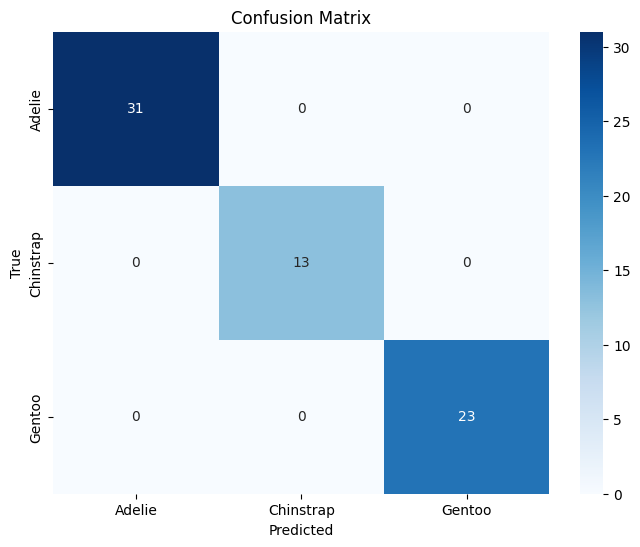

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Kode ini mengimpor berbagai library yang diperlukan untuk analisis data dan machine learning. `files.upload()` digunakan untuk mengunggah file dataset dari Google Colab. Setelah file diunggah, `pd.read_csv()` digunakan untuk memuat dataset ke dalam DataFrame `data`. Fungsi `print(data.head())` menampilkan lima baris pertama dari dataset untuk memeriksa data yang telah dimuat. Selain itu, library lain yang diimpor seperti `pandas` untuk manipulasi data, `numpy` untuk operasi matematika, `RandomForestClassifier` untuk model klasifikasi, dan `LabelEncoder` untuk mengubah variabel kategorikal menjadi numerik.


In [ ]:

# Importing libraries
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Upload file dataset
uploaded = files.upload()

# Load dataset
data = pd.read_csv(list(uploaded.keys())[0])  # Use the uploaded file
print("Dataset Loaded:")
print(data.head())


Saving penguins_size.csv to penguins_size (1).csv
Dataset Loaded:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Kode ini melakukan praproses data untuk mempersiapkan dataset agar siap digunakan dalam model machine learning. `data.dropna()` menghapus baris dengan nilai yang hilang, memastikan dataset bersih dari missing values. Kolom-kolom kategorikal seperti `island` dan `sex` kemudian dienkripsi menggunakan `LabelEncoder()`, yang mengubah nilai kategorikal menjadi angka untuk memudahkan pemrosesan model. Kolom target `species` juga dienkripsi jika diperlukan. Setelah itu, dataset dibagi menjadi fitur (`X`) dan target (`y`), dengan `X` berisi semua kolom kecuali target dan `y` berisi kolom target `species`. Terakhir, `train_test_split()` digunakan untuk membagi dataset menjadi data pelatihan dan pengujian, dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.


In [ ]:
# Praproses dataset (menangani nilai yang hilang, mengenkripsi variabel kategorikal, dll.)
data = data.dropna()  # Hapus nilai yang hilang
categorical_columns = ['island', 'sex']  # Ganti dengan kolom kategorikal yang sesuai

# Mengenkripsi variabel kategorikal
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Mengenkripsi variabel target jika diperlukan
data['species'] = encoder.fit_transform(data['species'])

# Membagi dataset
X = data.drop('species', axis=1)  # Ganti 'species' dengan nama kolom target yang sesuai
y = data['species']  # Variabel target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-11-9f9411ad2a61>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoder.fit_transform(data[col])
<ipython-input-11-9f9411ad2a61>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoder.fit_transform(data[col])
<ipython-input-11-9f9411ad2a61>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Kode ini digunakan untuk melatih model **Random Forest Classifier** dan mengevaluasi performa model. Model dilatih menggunakan **`model.fit()`** dengan data pelatihan **`X_train`** dan target **`y_train`**. Kemudian, akurasi model dihitung menggunakan **`accuracy_score`** pada data pelatihan dan pengujian untuk menilai seberapa baik model bekerja pada kedua dataset. Hasil akurasi untuk pelatihan dan pengujian ditampilkan. Selanjutnya, kode memeriksa kemungkinan **overfitting** atau **underfitting**. Jika akurasi pelatihan lebih tinggi 10% dari akurasi pengujian, maka model dianggap overfit, sedangkan jika sebaliknya, model dianggap underfit. Jika tidak ada perbedaan signifikan antara keduanya, maka model dianggap memiliki generalisasi yang baik.


In [ ]:
# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Mengevaluasi model pada dataset pelatihan dan pengujian
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Akurasi Pelatihan: {train_accuracy}")
print(f"Akurasi Pengujian: {test_accuracy}")

# Memeriksa kemungkinan overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print("Model mungkin mengalami overfitting.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model mungkin mengalami underfitting.")
else:
    print("Model memiliki generalisasi yang baik.")


Akurasi Pelatihan: 1.0
Akurasi Pengujian: 1.0
Model memiliki generalisasi yang baik.


Kode ini digunakan untuk mengevaluasi model menggunakan **matriks kebingungan** dan **laporan klasifikasi**. **`model.predict(X_test)`** digunakan untuk menghasilkan prediksi pada data uji **`X_test`**. Hasil prediksi ini kemudian dibandingkan dengan nilai sebenarnya **`y_test`**. **`confusion_matrix()`** menampilkan matriks kebingungan, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Selanjutnya, **`classification_report()`** menghasilkan laporan klasifikasi yang mencakup metrik seperti precision, recall, dan F1-score, memberikan gambaran lebih mendalam tentang performa model dalam mengklasifikasikan data.


In [ ]:
# Mengevaluasi menggunakan matriks kebingungan dan laporan klasifikasi
y_pred = model.predict(X_test)

# Menampilkan Matriks Kebingungan
print("Matriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Matriks Kebingungan:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
import pickle

# Simpan model ke file
with open('penguin_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
import pickle

# Simpan model ke file model.pkl
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model telah disimpan sebagai 'model.pkl'")


Model telah disimpan sebagai 'model.pkl'


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Muat model yang telah dilatih
with open('penguin_model.pkl', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()  # Ambil data JSON dari request
        features = data['features']  # Ambil fitur input

        # Lakukan prediksi
        prediction = model.predict([features])[0]

        return jsonify({'prediction': prediction})  # Kirim hasil prediksi
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(port=8000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Muat model yang telah dilatih
with open('penguin_model.pkl', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint untuk prediksi spesies penguin.
    Menerima data JSON dengan format: {'features': [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]}
    Mengembalikan prediksi spesies dalam bentuk JSON: {'prediction': species}
    """
    try:
        data = request.get_json()
        print(f"Received data: {data}")  # Menampilkan data yang diterima
        if not data or 'features' not in data:
            return jsonify({'error': 'Bad Request: Missing features data'}), 400

        features = data['features']
        print(f"Features: {features}")  # Menampilkan fitur

        features = np.array(features).reshape(1, -1)
        prediction = model.predict(features)[0]

        return jsonify({'prediction': prediction})
    except Exception as e:
        print(f"Error: {e}")
        return jsonify({'error': str(e)}), 400


if __name__ == '__main__':
    app.run(port=8000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!pip install flask-ngrok


In [ ]:
!pip install pyngrok


In [ ]:
from pyngrok import ngrok


In [ ]:
from pyngrok import ngrok

# Ganti 'your_authtoken' dengan authtoken yang Anda salin dari dashboard ngrok
ngrok.set_auth_token('2pogtHgjLenNZWa1i75Mutb2NLZ_JdJFbNzUKwMo14knhxur')

# Sekarang, Anda bisa membuka tunnel ngrok
public_url = ngrok.connect(5000)
print('Public URL:', public_url)


Public URL: NgrokTunnel: "https://9aea-35-221-143-114.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from pyngrok import ngrok

# Membuka tunnel untuk port 5000
public_url = ngrok.connect(5000)
print('Public URL:', public_url)


Public URL: NgrokTunnel: "https://eadd-35-221-143-114.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

app = Flask(__name__)

# Fungsi untuk melatih model dan menyimpannya
def train_model():
    # Membaca dataset lokal
    data = pd.read_csv('penguins_size.csv')  # Pastikan path sesuai dengan lokasi dataset Anda

    # Memeriksa beberapa baris pertama dataset untuk memastikan dataset terbaca
    print(data.head())

    # Menghapus baris yang memiliki nilai null
    data = data.dropna()

    # Encode kolom 'sex' (karena merupakan kategori)
    label_encoder = LabelEncoder()
    data['sex'] = label_encoder.fit_transform(data['sex'])

    # Memilih fitur dan target
    X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
    y = data['species']

    # Membagi data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Melatih model Random Forest dengan class_weight untuk mengatasi ketidakseimbangan kelas
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    # Menyimpan model dan label encoder ke file
    joblib.dump(model, 'penguin_species_model.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')

    # Menggunakan cross-validation untuk evaluasi lebih lanjut
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")

    # Evaluasi model pada data uji
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return model, label_encoder

# Memeriksa apakah model sudah ada, jika tidak, melatih model
def load_or_train_model():
    if os.path.exists('penguin_species_model.pkl') and os.path.exists('label_encoder.pkl'):
        # Memuat model dan label encoder dari file
        model = joblib.load('penguin_species_model.pkl')
        label_encoder = joblib.load('label_encoder.pkl')
        print("Model and label encoder loaded from files.")
    else:
        print("Model and label encoder not found, training a new model...")
        model, label_encoder = train_model()

    return model, label_encoder

# Memuat model dan label encoder
model, label_encoder = load_or_train_model()

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Mendapatkan data JSON dari request
        data = request.get_json()
        print("Data received:", data)

        # Ekstrak fitur dari data input
        features = data['features']

        # Membuat DataFrame untuk fitur
        input_data = pd.DataFrame([features], columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

        # Melakukan prediksi
        prediction = model.predict(input_data)

        # Mengembalikan hasil prediksi
        return jsonify({'prediction': prediction[0]})

    except Exception as e:
        return jsonify({'error': str(e)})


if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)
